# SydneyHousing

The aim of this notebook is to build some models that can predict NSW housing prices based on a set of scrapped features made available in the NSW Housing Dataset. The dataset was likely collected to analyze trends in the real estate market in Sydney, understand factors influencing property prices, and provide insights for buyers, sellers, and policymakers. The dataset includes geographical data, such as suburb names, latitude, longitude, and distance from the central business district (CBD).

We obtained the dataset from Kaggle (www.kaggle.com/datasets/alexlau203/sydney-house-prices). 

`imports`, you've seen this before!

In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import matplotlib.colors as mcolors
from datetime import datetime



Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [26]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [27]:
plt.rcParams["figure.figsize"] = (10, 5)


In [28]:
saved_style_state = plt.rcParams.copy()  # give us a style state to go back to


Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [29]:
if os.path.isfile("domain_properties.csv"):
    filepath = "domain_properties.csv"
    print("loading from file")
else:
    filepath = "https://www.kaggle.com/datasets/alexlau203/sydney-house-prices/data"
    print("loading from the internet")

properties_data = pd.read_csv(filepath)
print("done")


loading from file
done


In [36]:
pip install --upgrade matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   ------ --------------------------------- 1.3/7.8 MB 4.2 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/7.8 MB 4.7 MB/s eta 0:00:02
   ---------------- ----------------------- 3.1/7.8 MB 4.3 MB/s eta 0:00:02
   -------------------- ------------------- 3.9/7.8 MB 4.4 MB/s eta 0:00:01
   ------------------------ --------------- 4.7/7.8 MB 4.2 MB/s eta 0:00:01
   ---------------------------- ----------- 5.5/7.8 MB 4.2 MB/s eta 0:00:01
   --------------------------------- ------ 6.6/7.8 MB 4.2 MB/s eta 0:00:01
   ------------------------------------- -- 7.3/7.8 MB 4.3 MB/s eta 0:00:01
   -------------------------------------- - 7.6/7.8 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 4.0 MB/s eta 0:00:00
  Attempting uninstall: 

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\dell\\appdata\\local\\packages\\pythonsoftwarefoundation.python.3.12_qbz5n2kfra8p0\\localcache\\local-packages\\python312\\site-packages\\matplotlib\\backends\\_backend_agg.cp312-win_amd64.pyd'
Check the permissions.



In [44]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

df = pd.read_csv(filepath)

# Display the first few rows of the dataset
print(df.head())

# Check if the required columns for mapping are present
if 'suburb_lat' in df.columns and 'suburb_lng' in df.columns:
    # Create a GeoDataFrame using latitude and longitude
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['suburb_lng'], df['suburb_lat']))
    gdf.crs = "EPSG:4326"  # Set the coordinate reference system to WGS84

    # Define a colormap for the zones
    zone_colors = gdf['zone'].astype('category').cat.codes  # Convert zones to categorical codes
    colormap = plt.get_cmap('tab10', len(gdf['zone'].unique()))  # Choose a colormap

    # Plotting the map
    fig, ax = plt.subplots(figsize=(12, 12))
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    australia = world[world.name == "Australia"]
    australia.plot(ax=ax, color='white', edgecolor='black')

    # Plot the points on the map with color coding
    gdf.plot(ax=ax, column=zone_colors, cmap=colormap, markersize=50, alpha=0.6, legend=True)

    plt.title("Geographic Map of Properties in Sydney with Zones")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()
else:
    print("The dataset does not contain 'suburb_lat' and 'suburb_lng' columns necessary for mapping.")






    price date_sold         suburb  num_bath  num_bed  num_parking  \
0  530000   13/1/16      Kincumber         4        4            2   
1  525000   13/1/16     Halekulani         2        4            2   
2  480000   13/1/16  Chittaway Bay         2        4            2   
3  452000   13/1/16        Leumeah         1        3            1   
4  365500   13/1/16    North Avoca         0        0            0   

   property_size         type  suburb_population  suburb_median_income  \
0           1351        House               7093                 29432   
1            594        House               2538                 24752   
2            468        House               2028                 31668   
3            344        House               9835                 32292   
4           1850  Vacant land               2200                 45084   

   suburb_sqkm  suburb_lat  suburb_lng  suburb_elevation  cash_rate  \
0        9.914   -33.47252   151.40208                24       

KeyError: 'zone'

    price date_sold         suburb  num_bath  num_bed  num_parking  \
0  530000   13/1/16      Kincumber         4        4            2   
1  525000   13/1/16     Halekulani         2        4            2   
2  480000   13/1/16  Chittaway Bay         2        4            2   
3  452000   13/1/16        Leumeah         1        3            1   
4  365500   13/1/16    North Avoca         0        0            0   

   property_size         type  suburb_population  suburb_median_income  \
0           1351        House               7093                 29432   
1            594        House               2538                 24752   
2            468        House               2028                 31668   
3            344        House               9835                 32292   
4           1850  Vacant land               2200                 45084   

   suburb_sqkm  suburb_lat  suburb_lng  suburb_elevation  cash_rate  \
0        9.914   -33.47252   151.40208                24       

C:\Users\DELL\AppData\Local\Temp\ipykernel_21304\3508975675.py:17: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


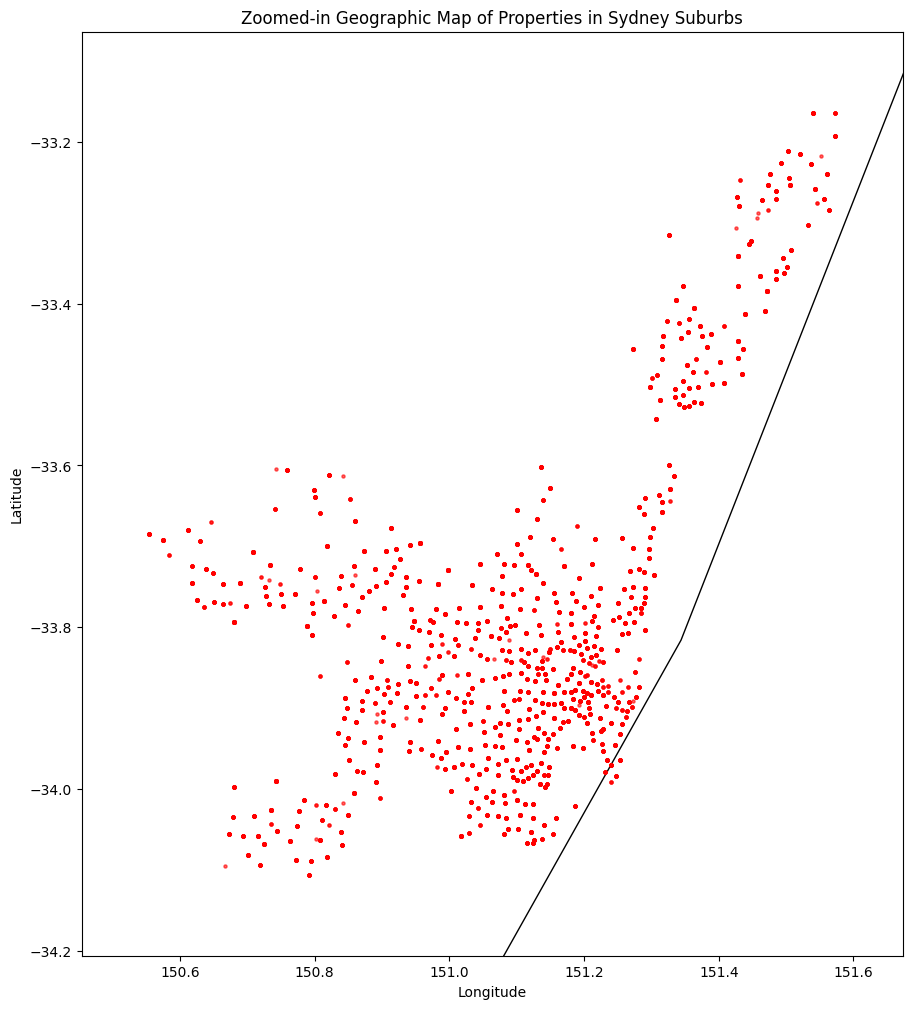

In [8]:
# Display the first few rows of the dataset
df = pd.read_csv(filepath)
print(df.head())

# Check if the required columns for mapping are present
if 'suburb_lat' in df.columns and 'suburb_lng' in df.columns:
    # Create a GeoDataFrame using latitude and longitude
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['suburb_lng'], df['suburb_lat']))
    gdf.crs = "EPSG:4326"  # Set the coordinate reference system to WGS84

    # Plotting the map
    fig, ax = plt.subplots(figsize=(12, 12))
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    australia = world[world.name == "Australia"]
    ax = australia.plot(ax=ax, color='white', edgecolor='black')
    
    # Plot the points on the map
    gdf.plot(ax=ax, color='red', markersize=5, alpha=0.6)

    plt.title("Geographic Map of Properties in Sydney")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()
else:
    print("The dataset does not contain 'suburb_lat' and 'suburb_lng' columns necessary for mapping.")

In [7]:
properties_data.head()


,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
0,530000,13/1/16,Kincumber,4,4,2,1351,House,7093,29432,9.914,-33.47252,151.40208,24,2.0,150.9,47.05
1,525000,13/1/16,Halekulani,2,4,2,594,House,2538,24752,1.397,-33.21772,151.55237,23,2.0,150.9,78.54
2,480000,13/1/16,Chittaway Bay,2,4,2,468,House,2028,31668,1.116,-33.32678,151.44557,3,2.0,150.9,63.59
3,452000,13/1/16,Leumeah,1,3,1,344,House,9835,32292,4.055,-34.05375,150.83957,81,2.0,150.9,40.12
4,365500,13/1/16,North Avoca,0,0,0,1850,Vacant land,2200,45084,1.497,-33.45608,151.43598,18,2.0,150.9,49.98


`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

`dataframe.sample(5)` gives you 5 random rows from your dataframe. It's a good way to avoid the trap where you confuse yourself the first few rows are odd.

In [8]:
properties_data.sample(5)


,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
2839,527500,30/10/18,Wyoming,1,3,1,575,House,10134,29380,7.138,-33.40534,151.36250,32,1.5,160.5,52.93
6721,1240000,19/5/21,Woronora Heights,2,4,2,724,House,2855,44252,2.599,-34.03389,151.02834,91,0.1,197.9,25.14
7135,1688888,26/6/21,Yowie Bay,2,3,2,569,House,3074,45292,1.205,-34.05003,151.10248,50,0.1,210.1,22.79
9630,1005000,15/11/21,Erskine Park,2,5,2,625,House,6436,40612,8.394,-33.80912,150.79558,62,0.1,220.1,38.85
5744,2850000,15/12/20,Church Point,2,4,2,732,House,997,54132,0.721,-33.65154,151.28137,73,0.1,183.1,24.60


We can also get the list of columns out of the data frame

In [9]:
properties_data.columns

Index(['price', 'date_sold', 'suburb', 'num_bath', 'num_bed', 'num_parking',
       'property_size', 'type', 'suburb_population', 'suburb_median_income',
       'suburb_sqkm', 'suburb_lat', 'suburb_lng', 'suburb_elevation',
       'cash_rate', 'property_inflation_index', 'km_from_cbd'],
      dtype='object')

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

You can't index a row directly, you need to use the `iloc` property. That means the _interger location_, so the zeroeth row would be `df.iloc[0]`. 

This gives us the row as a _Series_.

↓

In [10]:
row_one = properties_data.iloc[1]
row_one


price                           525000
date_sold                      13/1/16
suburb                      Halekulani
num_bath                             2
num_bed                              4
num_parking                          2
property_size                      594
type                             House
suburb_population                 2538
suburb_median_income             24752
suburb_sqkm                      1.397
suburb_lat                   -33.21772
suburb_lng                   151.55237
suburb_elevation                    23
cash_rate                          2.0
property_inflation_index         150.9
km_from_cbd                      78.54
Name: 1, dtype: object

Series objects are _very_ similar to dictionaries. They have more properties though.

In [11]:
row_one["suburb"]

'Halekulani'

You can access them like a dictionary ☝ or you can access them like a property 👇. 

I like the `my_series.key_name` best, but it won't work if there are spaces in your column title. That can happen if you are getting the data from somewhere else (i.e. you didn't make it).

In [12]:
row_one.suburb

'Halekulani'

Doing the same thing on a dataframe gives us the whole column

In [13]:
properties_data.suburb_population

0         7093
1         2538
2         2028
3         9835
4         2200
         ...  
11155    27971
11156    19326
11157    17252
11158    15313
11159     3951
Name: suburb_population, Length: 11160, dtype: int64

<Axes: >

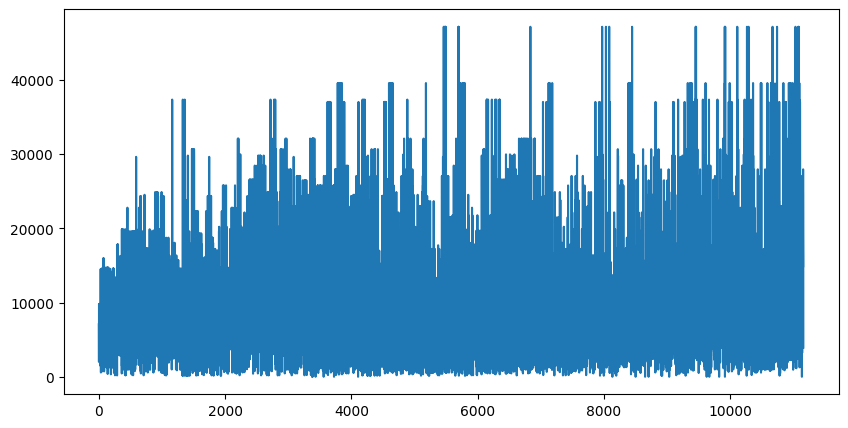

In [14]:
properties_data["suburb_population"].plot()

If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

<Axes: >

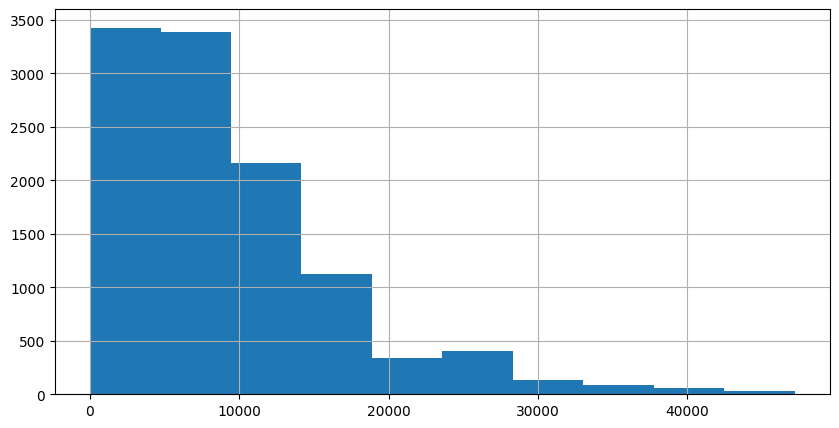

In [15]:
properties_data.suburb_population.hist()

The problem we have now is that almost _all_ fines are less than $2000, but there's a very long tail that fills up the right of the graph.

Let's exclude all the values above $3000, and see what it looks like.

We can do that with a nice feature of pandas, _boolean indexing_:

<Axes: >

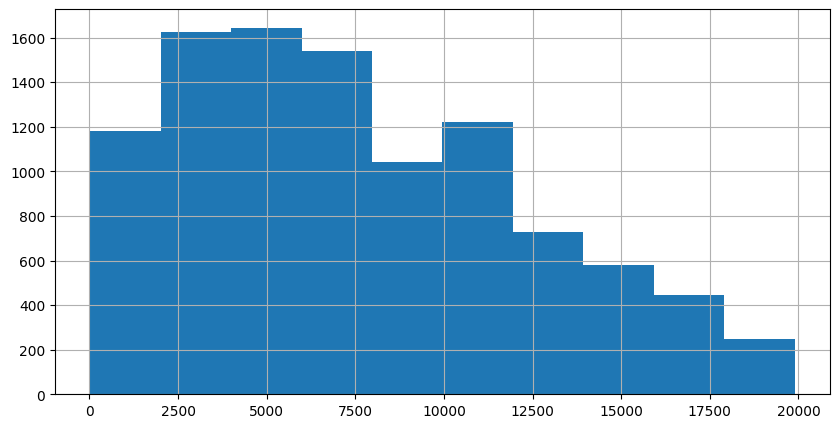

In [22]:
properties_data.suburb_population [properties_data.suburb_population < 20000].hist()


That's pretty crazy/powerful, so let's see that happen a bit more clearly.

We'll make our own series and call it  `some_numbers`

Let's give it the values 0-99 

In [17]:
# Note the capital S, I have no idea why they did that!
# but if you get an `AttributeError: 'module' object has no attribute 'series'` error...
#                 v
some_numbers = pd.Series(range(100))
some_numbers.head()


0    0
1    1
2    2
3    3
4    4
dtype: int64

We can use boolean indexing to get just the values that are less than 8

In [18]:
some_numbers[some_numbers < 8]

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
dtype: int64

Or we can be fancy and get the numbers that are less than 4 _or_ more than 97:

In [19]:
some_numbers[(some_numbers < 4) | (some_numbers >= 97)]
# this needs the round brackets, not really sure why.


0      0
1      1
2      2
3      3
97    97
98    98
99    99
dtype: int64

We can be _really fancy_ too!  Allow me to introduce the:

# 🎺 List comprehension 🎺

This needs to resolve to a list of booleans that matches the list of inputs. It's filtering only for values that are True.

If we use a list comprehension then we can do almost anything we like!

In [23]:
continuous_columns = ['price', 'num_bath', 'num_bed', 'num_parking', 'property_size', 'suburb_population',
                      'suburb_median_income', 'suburb_sqkm', 'suburb_lat', 'suburb_lng', 'suburb_elevation', 
                      'cash_rate', 'property_inflation_index', 'km_from_cbd']

column_series = pd.Series(continuous_columns)
pattern_of_bools = [("n" in continuous_columns) for pet_name in column_series]
print("pattern:",pattern_of_bools)

column_series[pattern_of_bools]

pattern: [False, False, False, False, False, False, False, False, False, False, False, False, False, False]


Series([], dtype: object)

_Note: the first `in` means a different thing to the second `in`. I was wondering if I should leave this out, but it's probably good to expose you to strange stuff!_

You've seen this _pattern_ before, we used to make the grids of stars etc.

In [24]:
data_we_care_about = []
for this_information in continuous_columns:
    if len(this_information) == 4:
        data_we_care_about.append(this_information)
data_we_care_about


[]

This comes up so often that python has a built in pattern for doing this called a _list comprehension_

This one is pretty silly because it takes the contents of one list and makes a new list out of it. Not doing anything else along the way.

In [25]:
[d for d in continuous_columns]

['price',
 'num_bath',
 'num_bed',
 'num_parking',
 'property_size',
 'suburb_population',
 'suburb_median_income',
 'suburb_sqkm',
 'suburb_lat',
 'suburb_lng',
 'suburb_elevation',
 'cash_rate',
 'property_inflation_index',
 'km_from_cbd']

This one converts the list to uppercase while it's doing the transfer

In [26]:
[d.upper() for d in continuous_columns]

['PRICE',
 'NUM_BATH',
 'NUM_BED',
 'NUM_PARKING',
 'PROPERTY_SIZE',
 'SUBURB_POPULATION',
 'SUBURB_MEDIAN_INCOME',
 'SUBURB_SQKM',
 'SUBURB_LAT',
 'SUBURB_LNG',
 'SUBURB_ELEVATION',
 'CASH_RATE',
 'PROPERTY_INFLATION_INDEX',
 'KM_FROM_CBD']

And this one has a condition. It asks if each pet name `p` is exactly 4 characters long. If it is, it lets it through its filter.

In [27]:
[d for d in continuous_columns if len(d) == 5]


['price']

And this one is doing both

In [28]:
[d.upper() for d in continuous_columns if len(d) == 9]


['CASH_RATE']

Anyway, back to our fines, it looks like we have a similar pattern of fines here, lots at the bottom end, not so many high value ones. 

This is using some pandas magic, not a list comprehension. The magic is that you can compare a series using < or > and get back a list of booleans. This wouldn't work using a list.

Let's add one more thing too, to make these graphs less garbage 🗑, a title.

Text(0.5, 1.0, 'All population under ppl3000')

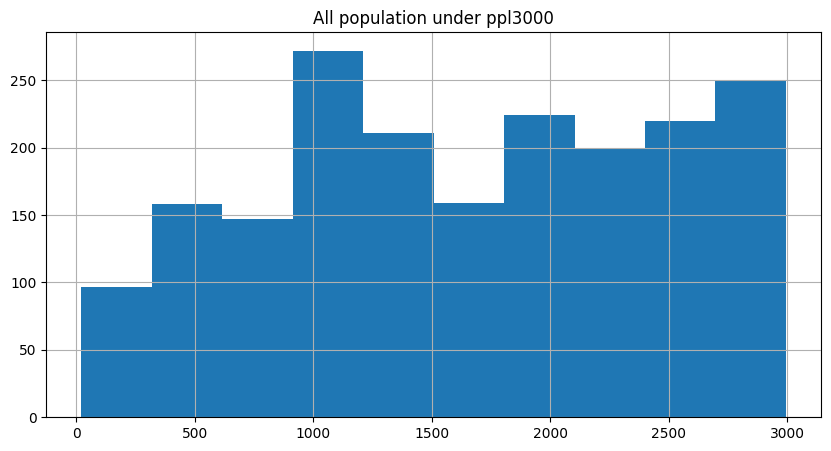

In [29]:
upper_bound = 3000
properties_data.suburb_population[properties_data.suburb_population < upper_bound].hist()
plt.title(f"All population under ppl{upper_bound}")


Let's see what's under $1000

Text(0.5, 1.0, 'All population under ppl1000')

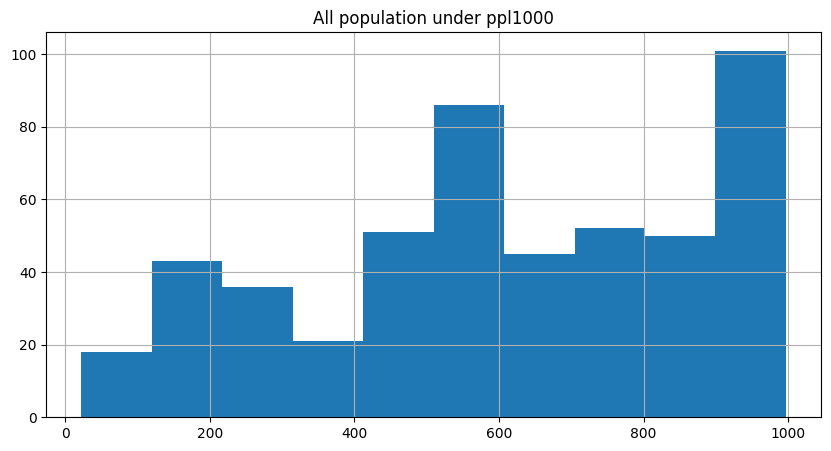

In [60]:
upper_bound = 1000
properties_data.suburb_population[properties_data.suburb_population < upper_bound].hist()
plt.title(f"All population under ppl{upper_bound}")


This warants some further investigation, but we'll come back to it in a bit. First, let's look at some of the other columns.

In the `LEGISLATION` column it tells us which law was invoked to give this fine. 

In [61]:
properties_data.head(2)

,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
0,530000,2016-01-13,Kincumber,4,4,2,1351,House,7093,29432,9.914,-33.47252,151.40208,24,2.0,150.9,47.05
1,525000,2016-01-13,Halekulani,2,4,2,594,House,2538,24752,1.397,-33.21772,151.55237,23,2.0,150.9,78.54


We can see that `FACE_VALUE` is numbers, we call that a _continuous_ value, so we can make histograms and other kinds of plots of it. `LEGISLATION` is strings, or _categorical_ values. We can't graph a string, but we can count how many times it shows up, and graph that number.

In [29]:
properties_data.type.value_counts()

type
House                            9583
Apartment / Unit / Flat           688
Townhouse                         211
Semi-Detached                     170
Vacant land                       163
Villa                             114
Duplex                             67
Terrace                            63
Block of Units                     37
Acreage / Semi-Rural               21
New House & Land                   15
New Apartments / Off the Plan       9
Development Site                    7
Studio                              5
Rural                               4
New land                            3
Name: count, dtype: int64

*ROAD RULES 2008* and *2014* are pretty popular, but only one person got a ticket under the *COMBAT SPORTS REGULATION 2014* and one other person got booked for something under the *TATTOO PARLOURS REGULATION 2013*

<Axes: xlabel='type'>

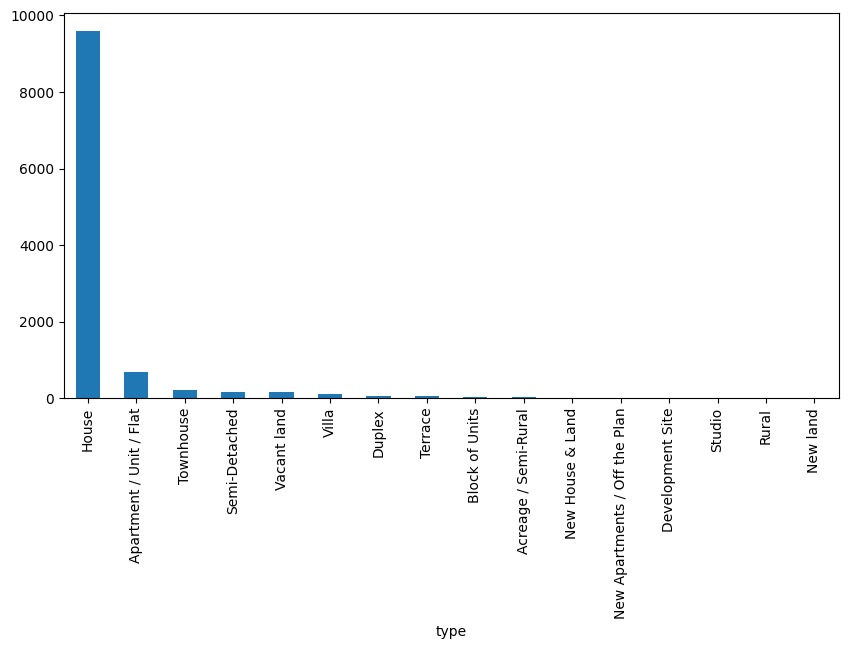

In [30]:
pdvc = properties_data.type.value_counts() # This makes a series
pdvc.plot(kind="bar")

We're going to see this distribution over and over again as we look at all kinds of data set.

These are probably the most common distributions, but they leave off the [power law](https://en.wikipedia.org/wiki/Power_law), which I think this probably is. 

![some common distributions and their relationships](https://storage.ning.com/topology/rest/1.0/file/get/136706870?profile=original&width=600) 

from [here](https://www.datasciencecentral.com/profiles/blogs/common-probability-distributions-the-data-scientist-s-crib-sheet)

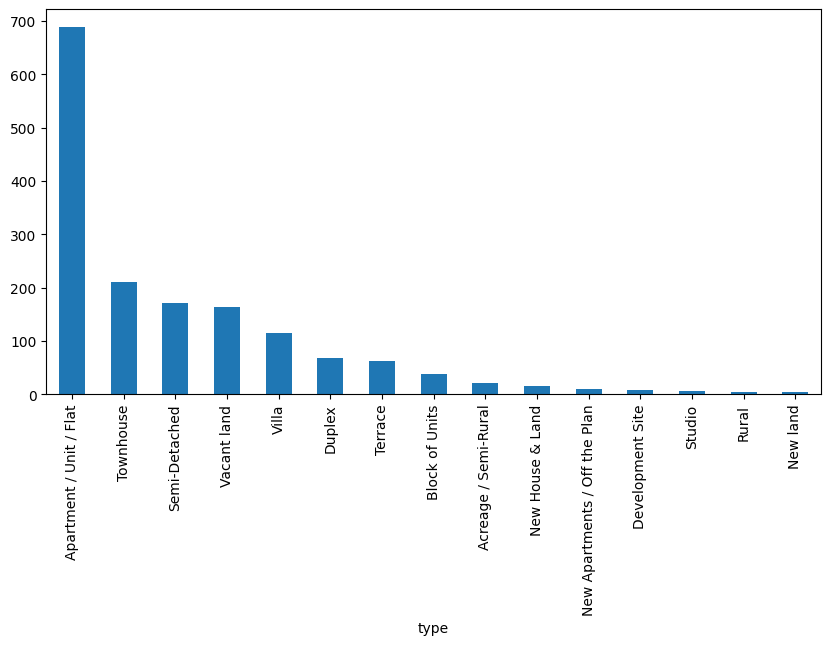

In [31]:
pdvc = properties_data.type.value_counts() 
pdvc[pdvc < 5000].plot(kind="bar");

This pattern keeps repeating itself:

<Axes: xlabel='type'>

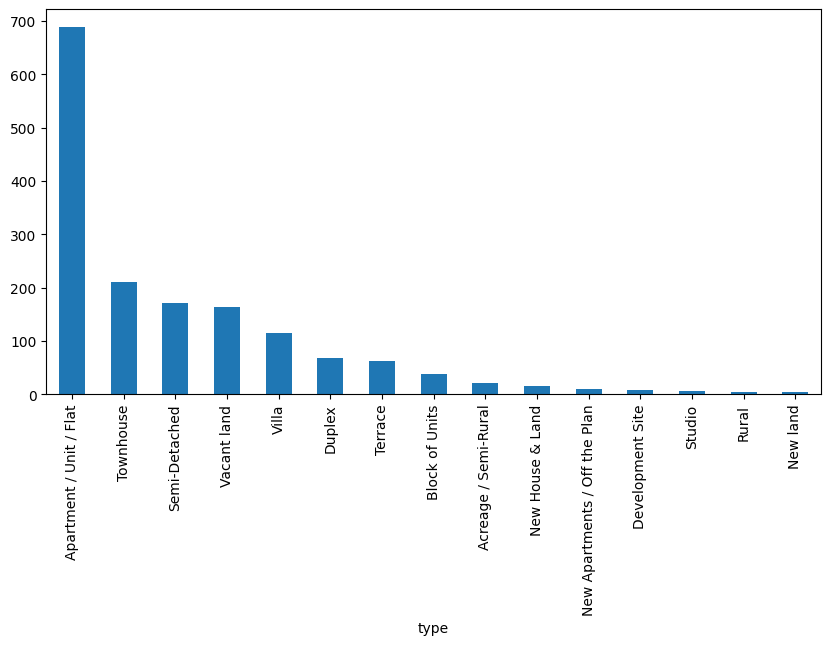

In [32]:
pdvc[pdvc < 1000].plot(kind="bar")

<Axes: xlabel='type'>

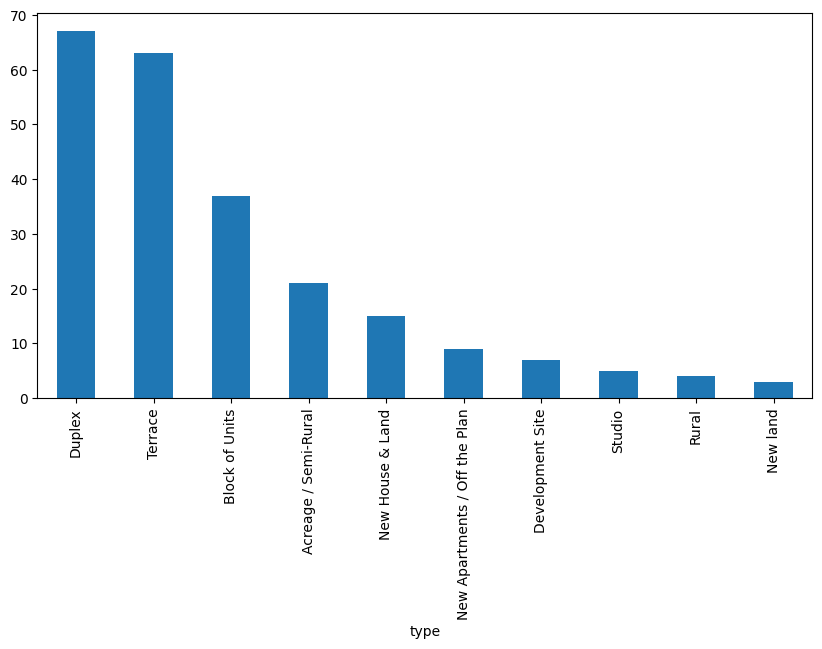

In [33]:
pdvc[pdvc < 100].plot(kind="bar")

There are a bunch of _keyword arguments_ that you can give to the `plot` function. In this case, let's flip it on into its side so we can read the labels more easily:

<Axes: ylabel='type'>

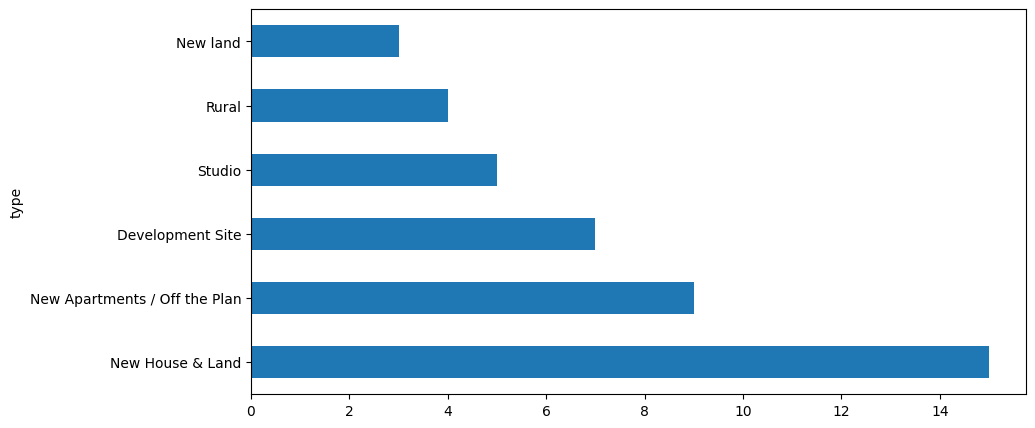

In [62]:
pdvc[pdvc < 20].plot(kind="barh")

# Making plots nice

I said we'd come back to our histogram. [Here's a demo histogram from the matplotlib website](http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html).

In [71]:
# This bit makes some random data. Ignore it unless you are a total nerd
mu = 100
sigma = 15
x = mu + sigma *np.random.randn(10000)


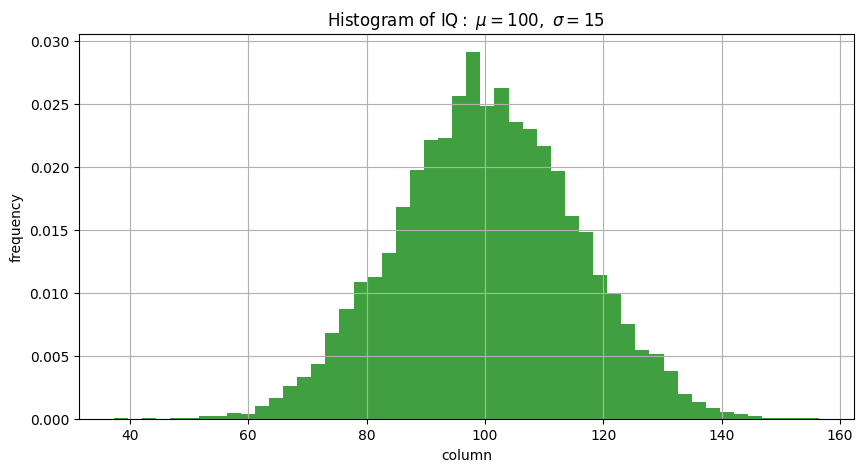

In [72]:
# the histogram of the data
plt.hist(x, 50, density=1, facecolor="green", alpha=0.75)
plt.xlabel("column")
plt.ylabel("frequency")
plt.title(
    r"$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$"
)  # allows for latex formatting
plt.grid(True)
# plt.show()


Here's how we made our histogram before:

<Axes: >

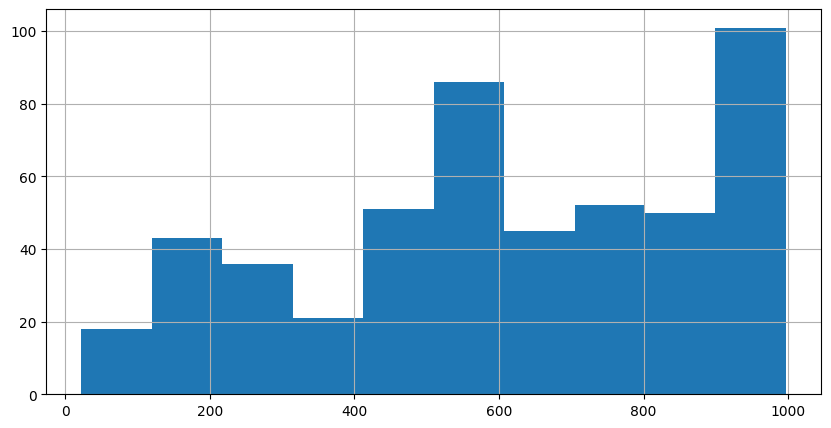

In [73]:
properties_data.suburb_population[properties_data.suburb_population < 1000].hist()


This is using the graphing tools from inside pandas

And this is how we'd change it so that we can add more features, by using Matplotlib directly:

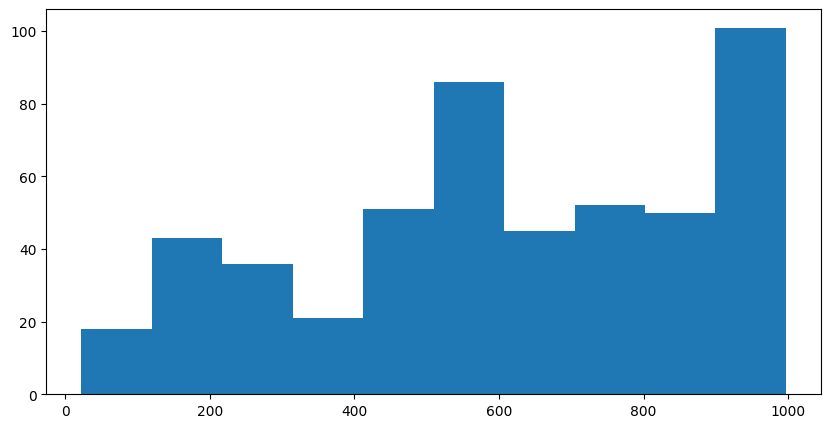

In [43]:
capped_face_value_data = properties_data.suburb_population[properties_data.suburb_population < 1000]

plt.hist(capped_face_value_data)
plt.show()


Let's look at some of the things we can do to this. The docs for histograms are here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

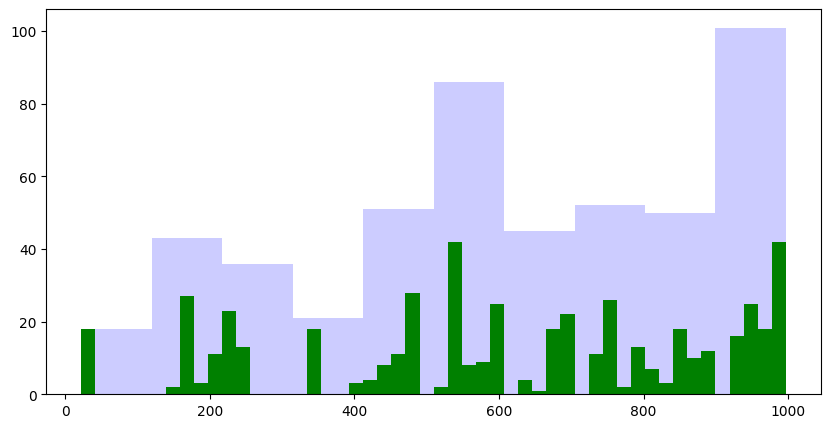

In [44]:
capped_face_value_data = properties_data.suburb_population[properties_data.suburb_population < 1000]

# We can keep adding things to this plot to see what's going on.
plt.hist(capped_face_value_data, bins=10, facecolor="blue", alpha=0.2)  # <-old one
plt.hist(capped_face_value_data, bins=50, facecolor="green", alpha=1)  # <-new one
plt.show()


We can go back to our initial, unfiltered, data:

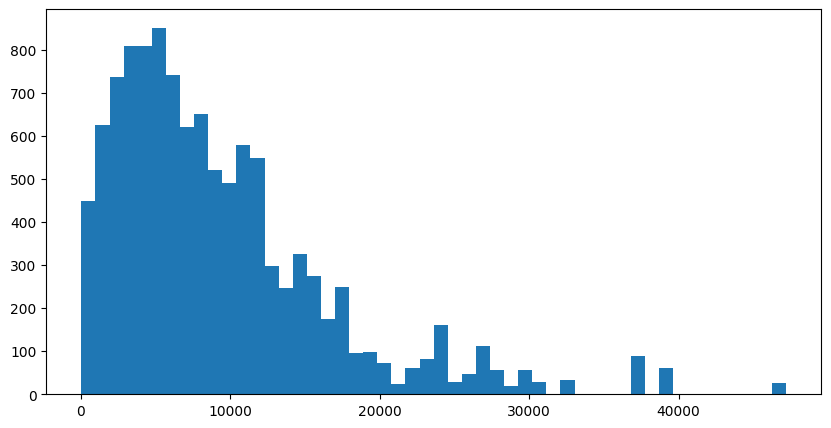

In [45]:
plt.hist(properties_data.suburb_population, bins=50)
plt.show()

Instead of doing the filtering before we present the data, we can use the graph to hide the extents of an axis:

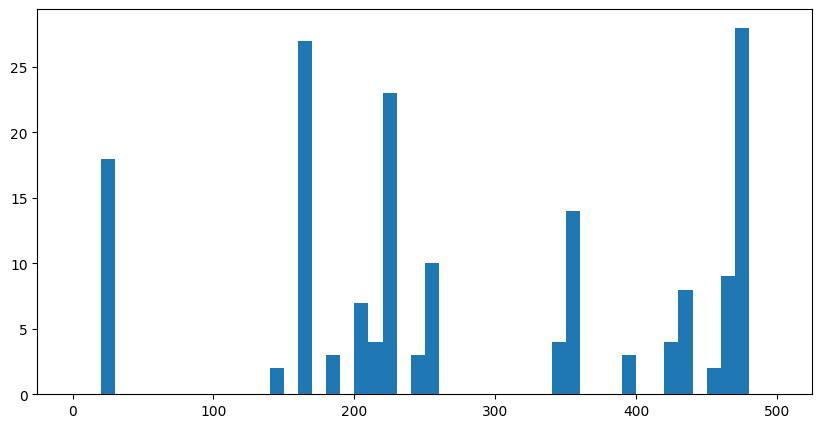

In [47]:
plt.hist(properties_data["suburb_population"], bins=50, range=(0, 500))
plt.show()

We can nice that up a bit by pulling the parameters out as variables:
(unmagically, no difference!)

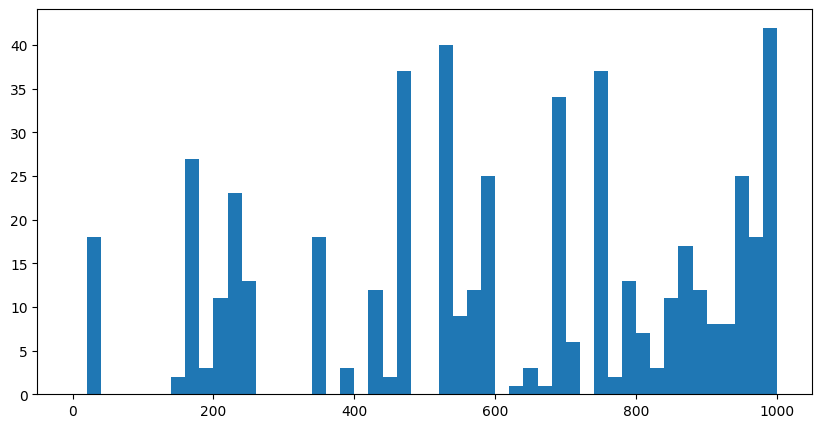

In [48]:
number_of_bins = 50
lower_bound = 0
upper_bound = 1000
plt.hist(
    properties_data.suburb_population,
    bins=number_of_bins,
    range=(lower_bound, upper_bound),
)
plt.show()


This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object.

Definitely a title and some axis labels. If you make charts/plots without axis labels, Linus Torvalds kills a kitten.

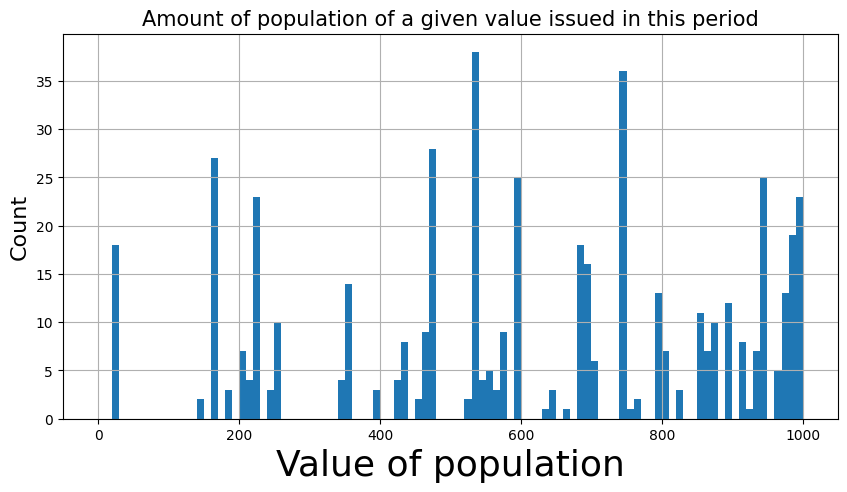

In [74]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(properties_data.suburb_population, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Amount of population of a given value issued in this period", fontsize=15)
plt.xlabel("Value of population", fontsize=26)
plt.ylabel("Count", fontsize=16)
plt.grid(True)
plt.show()


We could get the dates from the dataset if we wanted to be clever about it. But at the moment, the dates are just strings, not useful date objects. Let's fix that.

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

In [75]:
properties_data = pd.read_csv(
    filepath,
    infer_datetime_format=True,
    parse_dates=["date_sold"],
    dayfirst=True,
)
properties_data.head(2)


C:\Users\DELL\AppData\Local\Temp\ipykernel_12784\3067019403.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  properties_data = pd.read_csv(
C:\Users\DELL\AppData\Local\Temp\ipykernel_12784\3067019403.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  properties_data = pd.read_csv(


,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
0,530000,2016-01-13,Kincumber,4,4,2,1351,House,7093,29432,9.914,-33.47252,151.40208,24,2.0,150.9,47.05
1,525000,2016-01-13,Halekulani,2,4,2,594,House,2538,24752,1.397,-33.21772,151.55237,23,2.0,150.9,78.54


This is some straight up, powerful voodoo.

We can use a simple `min()` and `max()` method on the column to get the date range.

In [76]:
first_date = properties_data.date_sold.min()
last_date = properties_data.date_sold.max()
f"range is: {first_date} to {last_date}"


'range is: 2016-01-13 00:00:00 to 2022-01-01 00:00:00'

That's not very nice to look at, so we can [use `strftime`](https://strftime.org/), which is one of the most spooky and powerful things in the python toolbox

In [80]:
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(properties_data.date_sold.min(), date_format_pattern)
latest_date = datetime.strftime(properties_data.date_sold.max(), date_format_pattern)
f"range is: {earliest_date} to {latest_date}"


'range is: January, 2016 to January, 2022'

Which means that we can put those values into our graph title:

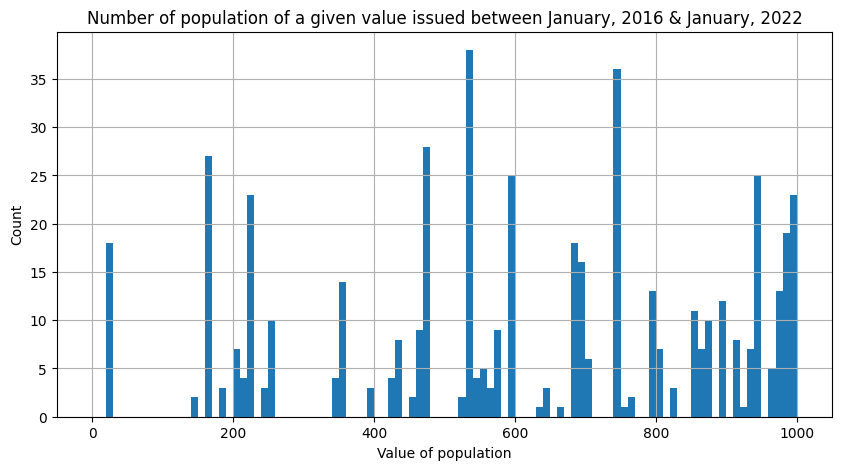

In [82]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(
    properties_data["suburb_population"], bins=number_of_bins, range=(lower_bound, upper_bound)
)
plt.title(
    f"Number of population of a given value issued between {earliest_date} & {latest_date}",
    fontsize=12,
)
plt.xlabel("Value of population", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.grid(True)
plt.show()


We're grouping the fines by month, and then adding up the groups. Pandas' `groupby` feature allows for all kinds of clever stuff like that.

I'm not going to explain `groupby` here, just be aware that it exists, and when you need it, we can go over it again.

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

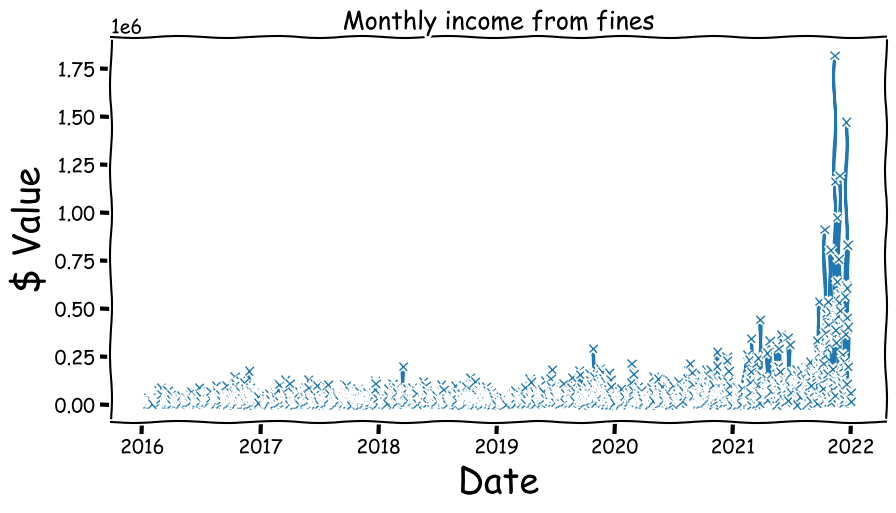

In [83]:
income = properties_data[["date_sold", "suburb_population"]].groupby("date_sold").sum()

plt.xkcd()
plt.plot(income, "x-")
plt.title("Monthly income from fines", fontsize=18)
plt.xlabel("Date", fontsize=26)
plt.ylabel("$ Value", fontsize=26)
plt.grid(True)
plt.show()


In [183]:
plt.rcParams.update(
    saved_style_state
)  # revert to regular matplotlib styles, not xkcd


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940:

I don't expect you to learn this this week, I just want to give you a taste of what can be done, quite simply, with pandas and matplotlib.

# some tricky tricks

Say you have a _lot_ of rows, running things on them takes a long time. You can test on a subset of that and then come bakc to the full dataframe once you are more sure that it works.

To do this we can use python slices in combination with the dataframe's `.loc` property.

In [184]:
ss = properties_data.loc[:5]


Let's say you want to apply a function to each row in a dataframe, and save the result as a new column in the dataframe. This is where `apply` come in handy.

In [58]:
ss["day_from_lambda"] = ss.apply(lambda x: x.date_sold.day, axis=1)
ss.head(2)


NameError: name 'ss' is not defined

Above is equivalent to below, it's up to you to decide what is more readable.

In [192]:
def my_f(x):
    return x.date_sold.day


ss["day_from_function"] = ss.apply(my_f, axis=1)
ss.head(1)


<ipython-input-192-ebf8f59cf10c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["day_from_function"] = ss.apply(my_f, axis=1)


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE,day,day_from_lambda,day_from_function
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,NaN,NaN,NaN,NaN,NaN,46,16238,1,1,1


Scroll all the way to the right to see the new column that we've created. Both of these ways of doing this make dan-numbers. What if we wanted to get day names? That's much easier to graph. W can use `strftime` again:

In [194]:
def my_f(x):
    return datetime.strftime(x.date_sold, "%A")


ss["nice_day"] = ss.apply(my_f, axis=1)
ss.head(1)


<ipython-input-194-e3cd89590808>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["nice_day"] = ss.apply(my_f, axis=1)


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE,day,day_from_lambda,day_from_function,nice_day
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,NaN,NaN,NaN,NaN,46,16238,1,1,1,Friday


Then once we're confident that it works, we can switch back from the limited part of the dataframe to the full dataframe:

<AxesSubplot:>

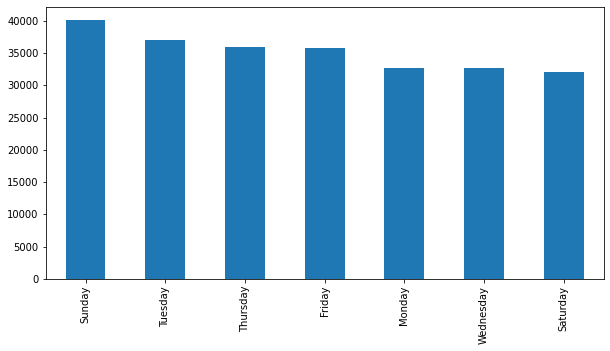

In [195]:
def my_f(x):
    return datetime.strftime(x.date_sold, "%A")


properties_data["nice_day"] = properties_data.apply(my_f, axis=1)
properties_data.nice_day.value_counts().plot(kind="bar")


And we can see that most of these fines are booked on a Sunday, which is a real _hmm_ moment 🤔

This would be the kind of question that it'd be good to explore in your project.

---

How do we tell the computer to treat _facade_ and _fašade_ the same? What about _University of new south wales_, _University of New South Wales_, _University of NSW_, _UNSW_, _New-south_?

## The answer is _folding_

_(This is a "pattern")_

In [187]:
def fold(given):
    """Return canonical versions of inputs."""

    # Use canonical variables so that you can define once, use many times.
    UNSW_canonical = "uni of stairs"
    ben_name_cannonical = "Ben Doherty"

    # dictionary of input:output pairs
    folds = {
        "University of new south wales": UNSW_canonical,
        "University of New South Wales": UNSW_canonical,
        "University of NSW": UNSW_canonical,
        "UNSW": UNSW_canonical,
        "New-south": UNSW_canonical,
        "BDoh": ben_name_cannonical,
        "Benny": ben_name_cannonical,
        "Mr Dockerty": ben_name_cannonical,
        "Oi, Dickhead!": ben_name_cannonical,
    }

    #     return folds[given] # needs a defensive part, but ommited for clarity.
    default_value = given
    return folds.get(given, default_value)


print(fold("New-south"))
print(fold("BDoh"))


uni of stairs
Ben Doherty


So you could use this function in an `apply` to make a new column on cleaned up values.

# _fin_